In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

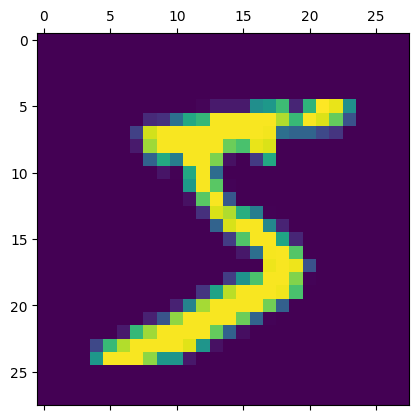

In [7]:
# voir un exemple
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
# afficher les cinq premières données
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Pre-processing

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# Mettre à l'échelle les données pour que les valeurs soient comprises entre 0 et 1.
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Applatissement des train data et test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
x_train_flattened.shape, x_train_flattened.shape

((60000, 784), (60000, 784))

### Simple layer neural network

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [16]:
# Optimizer aide lors de la rétropropagation pour atteindre de meilleurs optima globaux
model.compile(
    optimizer='adam',
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# training
history = model.fit(x_train_flattened, y_train, epochs=8, validation_split=0.2)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 4s 2ms/step - loss: 0.5155 - accuracy: 0.8647 - val_loss: 0.3160 - val_accuracy: 0.9112
Epoch 2/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3182 - accuracy: 0.9117 - val_loss: 0.2878 - val_accuracy: 0.9198
Epoch 3/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.9179 - val_loss: 0.2750 - val_accuracy: 0.9244
Epoch 4/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.9213 - val_loss: 0.2688 - val_accuracy: 0.9243
Epoch 5/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2739 - accuracy: 0.9231 - val_loss: 0.2691 - val_accuracy: 0.9247
Epoch 6/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2678 - accuracy: 0.9242 - val_loss: 0.2641 - val_accuracy: 0.9290
Epoch 7/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.9264 - val_loss: 0.2629 - val_accuracy: 0.9282
Epoch 8/8

In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9265


[0.2668825089931488, 0.9265000224113464]

### Exemple de prediction

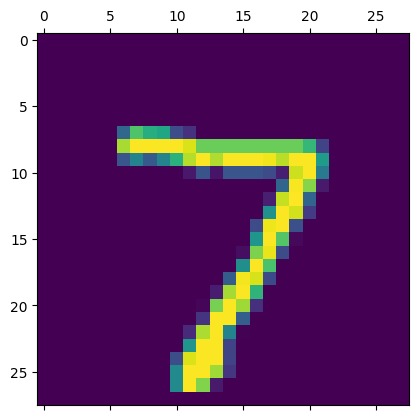

In [18]:
plt.matshow(x_test[0])

In [19]:
# prediction
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([9.3379244e-03, 1.3274003e-07, 4.0830944e-02, 9.7122359e-01,
       1.8421167e-03, 8.6850137e-02, 3.3937394e-07, 9.9986821e-01,
       7.5048834e-02, 7.7807558e-01], dtype=float32)

In [20]:
# trouver la valeur maximale en utilisant NumPy
np.argmax(y_predicted[0])

7

In [21]:
# Convertir y_predicted de nombres entiers en entiers pour pouvoir l'utiliser dans la matrice de confusion.
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

### confusion matrix pour la validation

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    0,    2,    0,    5,   13,    3,    3,    0],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   4,    9,  925,   16,    8,    3,   13,    9,   41,    4],
       [   3,    0,   22,  917,    0,   21,    3,   11,   25,    8],
       [   1,    1,    4,    2,  904,    0,   11,    5,    9,   45],
       [   9,    3,    2,   32,    8,  767,   17,    9,   37,    8],
       [   6,    3,    5,    1,    7,    9,  922,    2,    3,    0],
       [   1,    6,   21,    9,    7,    0,    0,  948,    2,   34],
       [   4,    6,    6,   18,    8,   18,    9,   11,  885,    9],
       [  10,    7,    1,   11,   19,    4,    0,   20,    9,  928]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix')

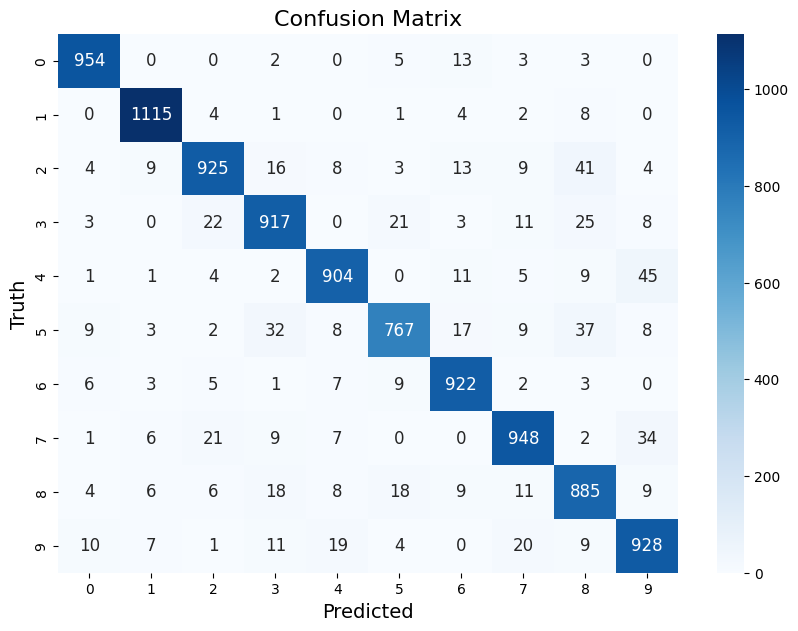

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Truth', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

<ipython-input-24-adb57d008b00>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


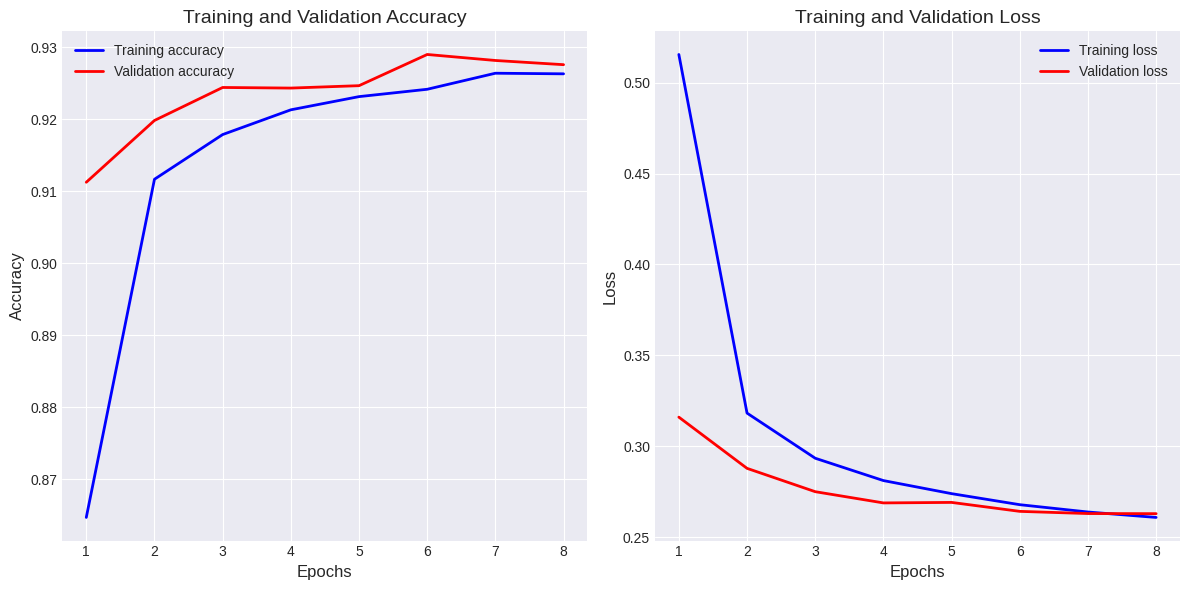

In [24]:
# Récupérer la précision et la perte d'entraînement et de validation
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Créer la plage d'époques
epochs = range(1, len(train_accuracy) + 1)

# Configurer un style moderne et propre pour les graphiques
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 6))

# Tracé de la précision d'entraînement et de validation
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy', linewidth=2)
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Tracé de la perte d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss', linewidth=2)
plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

plt.tight_layout()